# Capstone Project_CAP_1

Author: Gowtham Iyer

Dataset: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [33]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

## load file

In [34]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [35]:
print(dataset.shape)

(10000, 12)


In [36]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


##Understanding the data

In [37]:
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.00

## Enumerating features

In [48]:
le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

## Selecting class labels, and featureset

In [49]:
X = dataset.drop(columns='churn')
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

   customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619        0       0   42       2       0.00   
1     15647311           608        2       0   41       1   83807.86   
2     15619304           502        0       0   42       8  159660.80   
3     15701354           699        0       0   39       1       0.00   
4     15737888           850        2       0   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  
0                1            1              1         101348.88  
1                1            0              1         112542.58  
2                3            1              0         113931.57  
3                2            0              0          93826.63  
4                1            1              1          79084.10   

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64


## Understanding the dataset by plotting two features against their churn probability

In [32]:
import seaborn as sns
# Visualising the relationship between Customer Monthly Charges and Churn probability
sns.swarmplot(x="churn", y="credit_score", data=dataset)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7855ebe88280> (for post_execute):


KeyboardInterrupt: 

In [8]:
# Visualising the relationship between Customer Gender and Churn probability
sns.swarmplot(x="churn", y="estimated_salary", data=dataset)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 98.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

## Creating Logistic Reg. model and visualizing



In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#X_train = np.reshape(X_train.values, (-1,1))
#X_test = np.reshape(X_test.values, (-1,1))

#plt.scatter(X_train, y_train, c='g', marker=matplotlib.markers.CARETUP)
#plt.scatter(X_test, y_test, c='b', marker=matplotlib.markers.CARETDOWN)

#plt.title('sepal_length and flower class')
#plt.xlabel('sepal_length')
#plt.ylabel('flower class')
#plt.ylim(-1,4)
#plt.show()

(7000, 11)
(7000,)
(3000, 11)
(3000,)


In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Evaluate the performance of our model - Confusion Matrix

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

report = classification_report(y_test, y_pred)
print(report)

Accuracy of logistic regression classifier on test set: 0.79
[[2379    0]
 [ 621    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379
           1       0.00      0.00      0.00       621

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


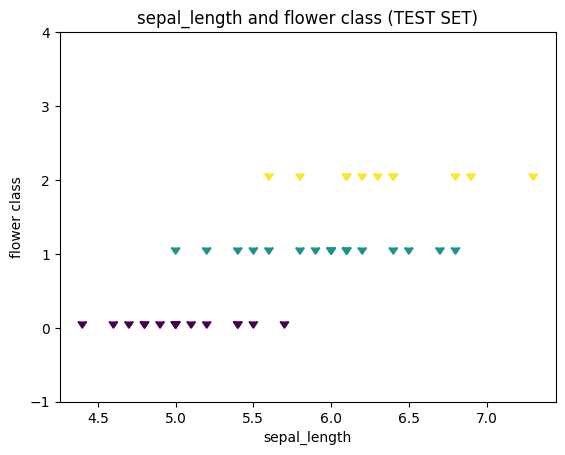

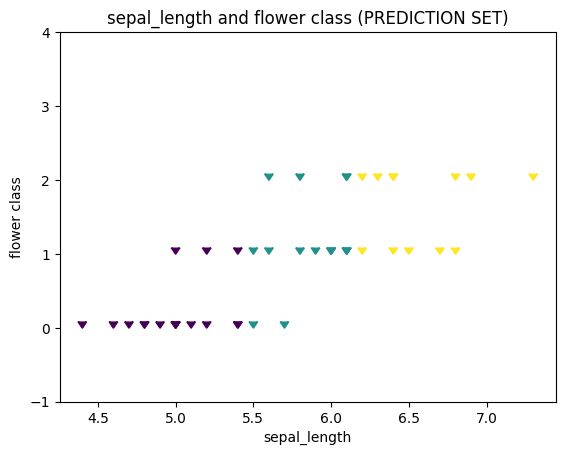

In [ ]:
# Visualising the results
plt.scatter(X_test, y_test, c=y_test, marker=matplotlib.markers.CARETDOWN )
plt.title('sepal_length and flower class (TEST SET)')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()

# Visualising the results
plt.scatter(X_test, y_test, c=y_pred, marker=matplotlib.markers.CARETDOWN )
plt.title('sepal_length and flower class (PREDICTION SET)')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()